In [36]:
from Tools import *
from photoObject import *
import emcee
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

In [37]:
def angstromTokms(centralA,As):
    c=299792
    v=c*(As-centralA)/centralA
    return v

def LineToRedshift(Obs,Rest):
    return (Obs/Rest)-1

def RedshiftToLine(Obs,z):
    return (Obs/(1+z))

def kmsToangstrom(v,centralA):
    c=299792
    As = centralA*(v+c)/c
    return np.abs(centralA-As)

In [38]:
#LAE
cat=ascii.read("../Catalogs/Binospec-Candels.cat")
Err=cat["LyaErr"]


In [39]:
#NONLAE
Spectra=np.load("../Catalogs/ALLSpectra.npy",allow_pickle=True).tolist()
FWHM=np.load("../Catalogs/FWHM.npy")

stuff={}
for gal in cat:
    stuff[gal["id_charlotte"]]=[gal["Type"],gal["photoz"]]
IDs=list(Spectra.keys())


Err2=[]
fw=[]
for id in IDs:
    type,zphot=stuff[id]
    if type=="NonDetect":
        spec=Spectra[id]
        wave,flux,err=spec
        fwhm=10**np.random.normal(loc=np.nanmean(np.log10(FWHM)),scale=np.nanstd(np.log10(FWHM)))
        fw.append(fwhm)
        lya,eks,fwhm=1215.335*(1+zphot) ,    20  ,fwhm/2

        mask=(wave>lya-eks) & (wave<lya+eks)
        wave,flux,err=wave[mask],flux[mask],err[mask]

        if np.isnan(np.mean(flux))==True or np.mean(flux)==0.0:
            continue

        extractSize=kmsToangstrom(fwhm,lya)
        mask=(wave>lya-extractSize) & (wave<lya+extractSize)
        wave,flux,err=wave[mask],flux[mask],err[mask]

        Err2.append(np.log10(np.sum(err)))


        #plt.plot(wave,flux)
        #plt.plot(wave,err)
        #plt.show()



In [40]:
print(np.median(Err2))
print(np.nanmedian(Err))

-17.553766121327108
-17.950244061566725


Text(0.5, 0, 'log10 Lya error [erg/s/cm2/A]')

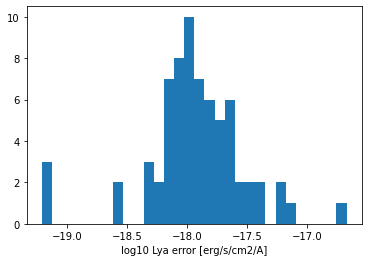

In [41]:
plt.hist(Err,bins=30)
plt.xlabel("log10 Lya error [erg/s/cm2/A]")

In [42]:
Errs=list(Err2)
np.save("../Catalogs/Errors.npy",Err)
np.save("../Catalogs/ErrorsLAE.npy",Err)

array([         nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan, -17.90925924,
                nan,          nan,          nan, -17.90671576,
                nan,          nan, -17.6443605 ,          nan,
                nan,          nan,          nan,          nan,
       -17.86614243,          nan,          nan, -17.81123598,
                nan,          nan,          nan, -17.98974817,
                nan, -18.0024054 , -17.97167523,          nan,
                nan,          nan,          nan,          nan,
                nan, -17.62265349,          nan,          nan,
                nan,          nan,          nan,          nan,
       -17.99902708, -18.54156353,          nan,          nan,
                nan,          nan,          nan,          nan,
       -17.64471968,          nan,          nan,          nan,
                nan,          nan,          nan,       

In [44]:
np.nanmean(np.load("../Catalogs/ErrorsLAE.npy"))

-17.93352342631863